In [149]:
import os
os.chdir("C:\\Users\\83688\\Documents\\ML\\Logistic regressiopn\\h1_n1 prediction")
import pandas as pd 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils import resample

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [150]:
df = pd.read_csv('hnc.csv') #19642; 31 , 1st is unique id 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 19642 non-null  int64  
 1   h1n1_worry                 19642 non-null  float64
 2   h1n1_awareness             19642 non-null  float64
 3   antiviral_medication       19642 non-null  float64
 4   contact_avoidance          19642 non-null  float64
 5   bought_face_mask           19642 non-null  float64
 6   wash_hands_frequently      19642 non-null  float64
 7   avoid_large_gatherings     19642 non-null  float64
 8   reduced_outside_home_cont  19642 non-null  float64
 9   avoid_touch_face           19642 non-null  float64
 10  dr_recc_h1n1_vacc          19642 non-null  float64
 11  dr_recc_seasonal_vacc      19642 non-null  float64
 12  chronic_medic_condition    19642 non-null  float64
 13  cont_child_undr_6_mnths    19642 non-null  flo

### _______________VIF to check Multicolinearity 

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [152]:
df['qualification'].value_counts()

College Graduate    8165
Some College        5570
12 Years            4287
< 12 Years          1620
Name: qualification, dtype: int64

In [153]:
df['age_bracket'].value_counts()

65+ Years        4491
55 - 64 Years    4234
45 - 54 Years    4038
18 - 34 Years    3925
35 - 44 Years    2954
Name: age_bracket, dtype: int64

In [154]:
df['qualification'] = df['qualification'].map({'< 12 Years':1, '12 Years':2, 'Some College':3, 'College Graduate':4}) 


In [155]:
df['age_bracket'] = df['age_bracket'].map({'18 - 34 Years':1, '35 - 44 Years':2, '45 - 54 Years':3, '55 - 64 Years':4,
                                                  '65+ Years':5})

In [156]:
df.sex.value_counts()

Female    11638
Male       8004
Name: sex, dtype: int64

In [157]:
df['sex'] = df['sex'].map({'Female': 0,'Male':1})

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 19642 non-null  int64  
 1   h1n1_worry                 19642 non-null  float64
 2   h1n1_awareness             19642 non-null  float64
 3   antiviral_medication       19642 non-null  float64
 4   contact_avoidance          19642 non-null  float64
 5   bought_face_mask           19642 non-null  float64
 6   wash_hands_frequently      19642 non-null  float64
 7   avoid_large_gatherings     19642 non-null  float64
 8   reduced_outside_home_cont  19642 non-null  float64
 9   avoid_touch_face           19642 non-null  float64
 10  dr_recc_h1n1_vacc          19642 non-null  float64
 11  dr_recc_seasonal_vacc      19642 non-null  float64
 12  chronic_medic_condition    19642 non-null  float64
 13  cont_child_undr_6_mnths    19642 non-null  flo

In [159]:
# first put your predictors in x
x = df.iloc[:, [1,2,15,16,17,18,19,20,21,23,26]] # x is a data frame
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns 

In [160]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
  
print(vif_data) # two columns, feature & VIF will appear

                   feature        VIF
0               h1n1_worry   5.759713
1           h1n1_awareness   6.628330
2   is_h1n1_vacc_effective  21.390106
3            is_h1n1_risky   7.203521
4      sick_from_h1n1_vacc   4.689096
5   is_seas_vacc_effective  20.908152
6            is_seas_risky   8.017402
7              age_bracket   5.406338
8            qualification  13.411080
9             income_level  16.792285
10              employment  15.695942


In [161]:
# drop VIF> 10
df = df.drop(['is_h1n1_vacc_effective', 'is_seas_vacc_effective',
               'qualification', 'employment','income_level'], axis = 1) 
df.info() # 19642, 27 [with 1st as Unnamed: 0, lets remove this]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 19642 non-null  int64  
 1   h1n1_worry                 19642 non-null  float64
 2   h1n1_awareness             19642 non-null  float64
 3   antiviral_medication       19642 non-null  float64
 4   contact_avoidance          19642 non-null  float64
 5   bought_face_mask           19642 non-null  float64
 6   wash_hands_frequently      19642 non-null  float64
 7   avoid_large_gatherings     19642 non-null  float64
 8   reduced_outside_home_cont  19642 non-null  float64
 9   avoid_touch_face           19642 non-null  float64
 10  dr_recc_h1n1_vacc          19642 non-null  float64
 11  dr_recc_seasonal_vacc      19642 non-null  float64
 12  chronic_medic_condition    19642 non-null  float64
 13  cont_child_undr_6_mnths    19642 non-null  flo

In [162]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.info() # 19642, 26
df.to_csv('hnvif.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

In [163]:
# X and y
X = df.loc[:, df.columns != 'h1n1_vaccine']
y = df.loc[:, df.columns == 'h1n1_vaccine']


In [164]:
# solver = liblinear
'''
liblinear [library for linear classification]: good for small data
newton-cg [newton conjugate]: can be used in this case
lbfgs[limited memory BFGS]: for multiclass problems
BFGS:Broyden–Fletcher–Goldfarb–Shanno algorithm 
sag [Stochastic Average Gradient Descent]: good for large data sets
saga: a little variant of sag
'''
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(X, y)
model1.intercept_
model1.coef_

C:\Users\83688\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-0.04623765,  0.25303098,  0.07259644, -0.01560407,  0.10849424,
         0.06901435, -0.19778026, -0.10185883,  0.02504662,  2.0135108 ,
        -0.5553533 ,  0.12227324,  0.22935839,  0.87077746,  0.45511072,
        -0.06269779,  0.21810606,  0.15661733,  0.2123646 , -0.1513231 ,
        -0.04568596,  0.12448821,  0.38200082,  0.36280023]])

In [165]:
#Predictions
y_pred = model1.predict(X)

#Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y, y_pred)
print(cm)

[[14203   925]
 [ 2606  1908]]


In [166]:
#Accuracy Score - correct predictions / total number of data points
model1.score(X,y) #.0.82

#(14200+1906)/(14200+928+2608+1906) # 0.82


0.820232155584971

In [167]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     15128
           1       0.67      0.42      0.52      4514

    accuracy                           0.82     19642
   macro avg       0.76      0.68      0.70     19642
weighted avg       0.81      0.82      0.80     19642



In [168]:
#ROC Curve - Receiver Operating Characteristic curve
#tpr = True Positive Rate 
#fpr = False Positive Rate
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred_prob = model1.predict_proba(X)
fpr, tpr, thresholds =roc_curve(df["h1n1_vaccine"], y_pred_prob[:,1])
roc_auc = auc(fpr, tpr) #Area under Curve 0.82
print(roc_auc)

0.8214471775570076


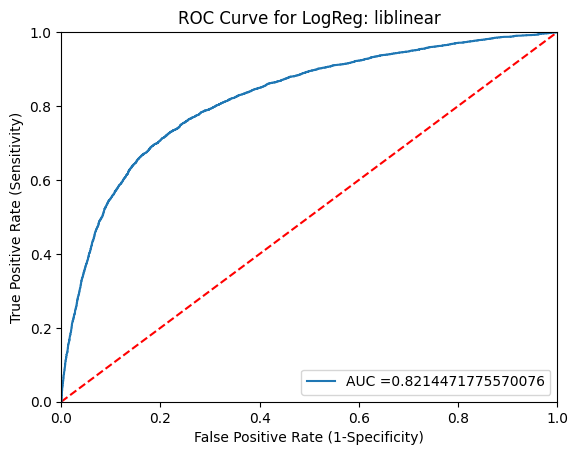

In [169]:
#ROC Curve
plt.title('ROC Curve for LogReg: liblinear')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()

### ____________________SMOTE (help to balance the target data distribution)
model 2

In [170]:
novac = df[df.h1n1_vaccine == 0] #15128,26
vac = df[df.h1n1_vaccine == 1] #4514, 26

#__________________________________ oversample minority_with replacement


In [171]:
from sklearn.utils import resample
vac_oversample = resample(vac,
                          replace=True, # sample with replacement
                          n_samples=len(novac), # match number in majority class
                          random_state=27) # reproducible results

In [172]:
# combine majority and oversampled minority

dfsmote = pd.concat([novac, vac_oversample]) 
dfsmote.h1n1_vaccine.value_counts()

0    15128
1    15128
Name: h1n1_vaccine, dtype: int64

In [173]:
dfsmote.to_csv('hnsmote.csv')


#___________________lets re do logistic reggresion


In [174]:
# X and y
X2 = dfsmote.loc[:, dfsmote.columns != 'h1n1_vaccine']
y2 = dfsmote.loc[:, dfsmote.columns == 'h1n1_vaccine']
y2.value_counts() # both 15,128

h1n1_vaccine
0               15128
1               15128
dtype: int64

In [175]:
# solver = liblinear
'''
liblinear [library for linear classification]: good for small data
newton-cg [newton conjugate]: can be used in this case
lbfgs[limited memory BFGS]: for multiclass problems
BFGS:Broyden–Fletcher–Goldfarb–Shanno algorithm 
sag [Stochastic Average Gradient Descent]: good for large data sets
saga: a little variant of sag
'''
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='liblinear', random_state=0)
model2.fit(X2, y2)
print(model2.intercept_)
model2.coef_


[-3.30998212]


C:\Users\83688\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-1.29242721e-02,  2.38668278e-01,  1.29007149e-01,
        -9.54300061e-04,  1.39098781e-01,  9.95669861e-02,
        -2.08879787e-01, -1.27258657e-01, -2.42611435e-02,
         2.10515914e+00, -6.36634339e-01,  1.32691564e-01,
         1.88234695e-01,  9.44261122e-01,  4.38240676e-01,
        -5.76963156e-02,  2.29492709e-01,  1.51161285e-01,
         2.40119359e-01, -1.49571634e-01,  3.76828864e-02,
         3.23880180e-02,  2.74826392e-01,  2.54755798e-01]])

In [176]:
#Predictions
y_pred2 = model2.predict(X2)

In [177]:
#Confusion matrix
from sklearn import metrics
cm2 = metrics.confusion_matrix(y2, y_pred2)
print(cm2)

[[11832  3296]
 [ 4132 10996]]


In [178]:
#Accuracy Score - correct predictions / total number of data points
model2.score(X2,y2) #WITH SMOTE = 0.75; without = #.0.82
#(11848+10974)/(11848+3200+4154+10974) # 0.75

0.7544949762030672

In [179]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y2, y_pred2))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     15128
           1       0.77      0.73      0.75     15128

    accuracy                           0.75     30256
   macro avg       0.76      0.75      0.75     30256
weighted avg       0.76      0.75      0.75     30256



Now you notice here that the recall for the both the groups are almost balanced 

0.8199350056147002


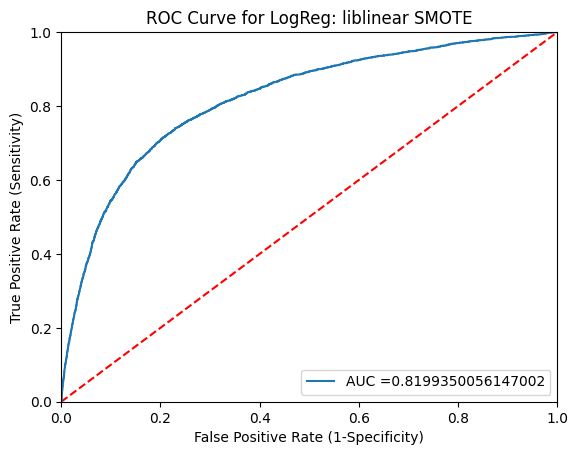

In [180]:
#ROC Curve - Receiver Operating Characteristic curve
#tpr = True Positive Rate 
#fpr = False Positive Rate
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred_prob2 = model2.predict_proba(X2)
fpr2, tpr2, thresholds2 =roc_curve(dfsmote["h1n1_vaccine"], y_pred_prob2[:,1])
roc_auc2 = auc(fpr2, tpr2) #Area under Curve 0.82
print(roc_auc2) # 0.82, same as without smote

#ROC Curve
plt.title('ROC Curve for LogReg: liblinear SMOTE')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr2, tpr2, label = 'AUC =' +str(roc_auc2))
plt.legend(loc=4) #Location of label
plt.show()


# GLM Method

In [181]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [182]:
df = pd.read_csv('hnsmote.csv')

In [183]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30256 entries, 0 to 30255
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 30256 non-null  int64  
 1   h1n1_worry                 30256 non-null  float64
 2   h1n1_awareness             30256 non-null  float64
 3   antiviral_medication       30256 non-null  float64
 4   contact_avoidance          30256 non-null  float64
 5   bought_face_mask           30256 non-null  float64
 6   wash_hands_frequently      30256 non-null  float64
 7   avoid_large_gatherings     30256 non-null  float64
 8   reduced_outside_home_cont  30256 non-null  float64
 9   avoid_touch_face           30256 non-null  float64
 10  dr_recc_h1n1_vacc          30256 non-null  float64
 11  dr_recc_seasonal_vacc      30256 non-null  float64
 12  chronic_medic_condition    30256 non-null  float64
 13  cont_child_undr_6_mnths    30256 non-null  flo

In [184]:
df = df.drop(['Unnamed: 0'] , axis= 1)

In [185]:
df.rename(columns={'race_Other or Multiple':'race_other'} , inplace = True)

In [186]:
df.race_other.value_counts()

0    28536
1     1720
Name: race_other, dtype: int64

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30256 entries, 0 to 30255
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 30256 non-null  float64
 1   h1n1_awareness             30256 non-null  float64
 2   antiviral_medication       30256 non-null  float64
 3   contact_avoidance          30256 non-null  float64
 4   bought_face_mask           30256 non-null  float64
 5   wash_hands_frequently      30256 non-null  float64
 6   avoid_large_gatherings     30256 non-null  float64
 7   reduced_outside_home_cont  30256 non-null  float64
 8   avoid_touch_face           30256 non-null  float64
 9   dr_recc_h1n1_vacc          30256 non-null  float64
 10  dr_recc_seasonal_vacc      30256 non-null  float64
 11  chronic_medic_condition    30256 non-null  float64
 12  cont_child_undr_6_mnths    30256 non-null  float64
 13  is_health_worker           30256 non-null  flo

In [187]:
modelGLM = smf.glm(formula='''h1n1_vaccine ~ h1n1_worry+h1n1_awareness+antiviral_medication+contact_avoidance+bought_face_mask+wash_hands_frequently
+avoid_large_gatherings+reduced_outside_home_cont+avoid_touch_face+dr_recc_h1n1_vacc+dr_recc_seasonal_vacc+chronic_medic_condition+cont_child_undr_6_mnths+
is_health_worker+is_h1n1_risky+sick_from_h1n1_vacc+is_seas_risky+age_bracket+sex+marital_status+housing_status+housing_status+race_Hispanic+race_other+race_White''' , data=df , family = sm.families.Binomial())


In [188]:
result = modelGLM.fit()

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           h1n1_vaccine   No. Observations:                30256
Model:                            GLM   Df Residuals:                    30231
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15789.
Date:                Thu, 05 Jan 2023   Deviance:                       31579.
Time:                        21:25:05   Pearson chi2:                 3.14e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2901
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

h1n1_worry , contact_avoidance , avoid_touch_face , housing_status , race_Hispanic has more p-value hence we remove them 

In [189]:
prediction = result.predict()

In [190]:
prediction_nominal = [0 if x < 0.5 else 1 for x in prediction]
prediction_nominal

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [191]:
# confusion matrix 
from sklearn.metrics import confusion_matrix , classification_report

print(confusion_matrix(df['h1n1_vaccine'] , prediction_nominal))

[[11831  3297]
 [ 4134 10994]]


In [192]:
# ROC and AUC curve

from sklearn.metrics import roc_curve , auc , roc_auc_score

fpr , tpr ,threshold = roc_curve(df['h1n1_vaccine'],prediction)

roc_auc = auc(fpr ,tpr) # Area under curve
print(roc_auc)

0.8199358838947661


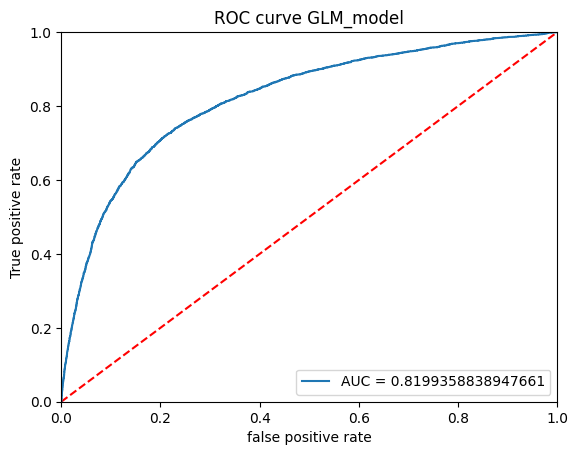

In [193]:
plt.title('ROC curve GLM_model')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr , tpr , label = 'AUC = ' + str(roc_auc))
plt.legend(loc=4)
plt.show()

In [194]:
print(classification_report(df['h1n1_vaccine'] , prediction_nominal ,digits= 3))

              precision    recall  f1-score   support

           0      0.741     0.782     0.761     15128
           1      0.769     0.727     0.747     15128

    accuracy                          0.754     30256
   macro avg      0.755     0.754     0.754     30256
weighted avg      0.755     0.754     0.754     30256



In [195]:
# Remove these h1n1_worry , contact_avoidance , avoid_touch_face , housing_status , race_Hispanic

In [196]:
df1 = df.drop(['h1n1_worry' , 'contact_avoidance' , 'avoid_touch_face' , 'housing_status' , 'race_Hispanic'] , axis= 1)

In [197]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30256 entries, 0 to 30255
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_awareness             30256 non-null  float64
 1   antiviral_medication       30256 non-null  float64
 2   bought_face_mask           30256 non-null  float64
 3   wash_hands_frequently      30256 non-null  float64
 4   avoid_large_gatherings     30256 non-null  float64
 5   reduced_outside_home_cont  30256 non-null  float64
 6   dr_recc_h1n1_vacc          30256 non-null  float64
 7   dr_recc_seasonal_vacc      30256 non-null  float64
 8   chronic_medic_condition    30256 non-null  float64
 9   cont_child_undr_6_mnths    30256 non-null  float64
 10  is_health_worker           30256 non-null  float64
 11  is_h1n1_risky              30256 non-null  float64
 12  sick_from_h1n1_vacc        30256 non-null  float64
 13  is_seas_risky              30256 non-null  flo

In [198]:
modelGLM = smf.glm(formula='''h1n1_vaccine ~ h1n1_awareness+antiviral_medication+bought_face_mask+wash_hands_frequently
+avoid_large_gatherings+reduced_outside_home_cont+dr_recc_h1n1_vacc+dr_recc_seasonal_vacc+chronic_medic_condition+cont_child_undr_6_mnths+
is_health_worker+is_h1n1_risky+sick_from_h1n1_vacc+is_seas_risky+age_bracket+sex+marital_status+race_other+race_White''' , data=df1 , family = sm.families.Binomial())


In [199]:
result = modelGLM.fit()

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           h1n1_vaccine   No. Observations:                30256
Model:                            GLM   Df Residuals:                    30236
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15791.
Date:                Thu, 05 Jan 2023   Deviance:                       31581.
Time:                        21:25:06   Pearson chi2:                 3.14e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2900
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [200]:
prediction = result.predict()

In [201]:
prediction_nominal3 = [0 if x < 0.5 else 1 for x in prediction]
prediction_nominal3

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [202]:
# confusion matrix 
from sklearn.metrics import confusion_matrix , classification_report

print(confusion_matrix(df1['h1n1_vaccine'] , prediction_nominal3))

[[11823  3305]
 [ 4153 10975]]


In [203]:
# ROC and AUC curve

from sklearn.metrics import roc_curve , auc , roc_auc_score

fpr3 , tpr3 ,threshold3 = roc_curve(df1['h1n1_vaccine'],prediction)

roc_auc = auc(fpr3 ,tpr3) # Area under curve
print(roc_auc)

0.8198728290664595


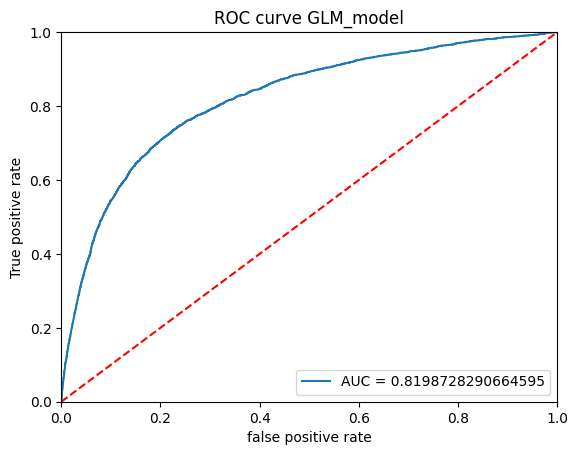

In [204]:
plt.title('ROC curve GLM_model')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr3 , tpr3 , label = 'AUC = ' + str(roc_auc))
plt.legend(loc=4)
plt.show()

In [205]:
print(classification_report(df1['h1n1_vaccine'] , prediction_nominal3 ,digits= 3))

              precision    recall  f1-score   support

           0      0.740     0.782     0.760     15128
           1      0.769     0.725     0.746     15128

    accuracy                          0.754     30256
   macro avg      0.754     0.754     0.753     30256
weighted avg      0.754     0.754     0.753     30256



## Model 2 - Decesion tree classification

In [213]:
#x = range(0,5)
#x[4]

4

In [214]:
df.shape

(30256, 25)

In [215]:
X = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24]]
y = df.iloc[:, 21:22]

In [216]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.3 , random_state= 15)

In [217]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 33)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_features=6, max_leaf_nodes=400, random_state=33)

In [220]:
# Predicting Cross Validation Score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

cv_dt = cross_val_score(estimator = classifier_dt, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_dt.mean())

y_pred_dt_train = classifier_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

CV:  0.7611323951125449
Training set:  0.7940412672930733
Test set:  0.7665528258235099


In [221]:
confusion_matrix(y_test, y_pred_dt_test)

array([[3384, 1121],
       [ 998, 3574]], dtype=int64)

In [222]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_pred_dt_test))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      4505
           1       0.76      0.78      0.77      4572

    accuracy                           0.77      9077
   macro avg       0.77      0.77      0.77      9077
weighted avg       0.77      0.77      0.77      9077



In [ ]:
tp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,0]
fp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,1]
tn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,1]
fn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,0]

## Model- 3 Random Forest Classification

In [230]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 400, random_state=25)
classifier_rf.fit(X_train , y_train)

C:\Users\83688\AppData\Local\Temp\ipykernel_24864\3769471997.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_rf.fit(X_train , y_train)


RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=400,
                       random_state=25)

In [231]:
# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = classifier_rf, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_rf.mean())

y_pred_rf_train = classifier_rf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

C:\Users\83688\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\83688\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\83688\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\83688\AppData\Local\Programs\Py

CV:  0.8956982973839634
Training set:  0.9917843146513056
Test set:  0.9059160515588851


In [232]:
confusion_matrix(y_test, y_pred_rf_test)

array([[3897,  608],
       [ 246, 4326]], dtype=int64)

In [233]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      4505
           1       0.88      0.95      0.91      4572

    accuracy                           0.91      9077
   macro avg       0.91      0.91      0.91      9077
weighted avg       0.91      0.91      0.91      9077



In [234]:
tp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,0]
fp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,1]
tn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,1]
fn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,0]

## Model - 4 Naive bayse

In [242]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
from numpy import ravel
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

C:\Users\83688\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [243]:
# Predicting Cross Validation Score
cv_nb = cross_val_score(estimator = classifier_nb, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_nb.mean())

y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

C:\Users\83688\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\83688\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\83688\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\83688\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConve

CV:  0.7143877545103423
Training set:  0.7148590585013457
Test set:  0.705849950424149


In [244]:
confusion_matrix(y_test, y_pred_nb_test)

array([[3255, 1250],
       [1420, 3152]], dtype=int64)

In [245]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_pred_nb_test))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      4505
           1       0.72      0.69      0.70      4572

    accuracy                           0.71      9077
   macro avg       0.71      0.71      0.71      9077
weighted avg       0.71      0.71      0.71      9077



In [246]:
tp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,0]
fp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,1]
tn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,1]
fn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,0]

## Model - 5  Support Vector Machine (SVM - Kernel)

In [247]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm_kernel = SVC(kernel = 'rbf', C = 10, tol = 0.001, gamma = 'scale')
classifier_svm_kernel.fit(X_train, y_train)

C:\Users\83688\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10)

In [249]:
import warnings
warnings.filterwarnings('ignore')

In [250]:
# Predicting Cross Validation Score
cv_svm_kernel = cross_val_score(estimator = classifier_svm_kernel, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_svm_kernel.mean())

y_pred_svm_kernel_train = classifier_svm_kernel.predict(X_train)
accuracy_svm_kernel_train = accuracy_score(y_train, y_pred_svm_kernel_train)
print("Training set: ", accuracy_svm_kernel_train)

y_pred_svm_kernel_test = classifier_svm_kernel.predict(X_test)
accuracy_svm_kernel_test = accuracy_score(y_test, y_pred_svm_kernel_test)
print("Test set: ", accuracy_svm_kernel_test)

CV:  0.7685450931641555
Training set:  0.7854950658671326
Test set:  0.7651206345708935


In [251]:
confusion_matrix(y_test, y_pred_svm_kernel_test)

array([[3571,  934],
       [1198, 3374]], dtype=int64)

In [252]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_pred_svm_kernel_test))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      4505
           1       0.78      0.74      0.76      4572

    accuracy                           0.77      9077
   macro avg       0.77      0.77      0.77      9077
weighted avg       0.77      0.77      0.76      9077



In [253]:
tp_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[0,0]
fp_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[0,1]
tn_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[1,1]
fn_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[1,0]

## Model-6 Support Vector Machine (SVM - Linear)

In [254]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm_linear = SVC(kernel = 'linear')
classifier_svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [256]:
# Predicting Cross Validation Score
cv_svm_linear = cross_val_score(estimator = classifier_svm_linear, X = X_train, y = y_train, cv = 10)
print("CV: ", cv_svm_linear.mean())

y_pred_svm_linear_train = classifier_svm_linear.predict(X_train)
accuracy_svm_linear_train = accuracy_score(y_train, y_pred_svm_linear_train)
print("Training set: ", accuracy_svm_linear_train)

y_pred_svm_linear_test = classifier_svm_linear.predict(X_test)
accuracy_svm_linear_test = accuracy_score(y_test, y_pred_svm_linear_test)
print("Test set: ", accuracy_svm_linear_test)

CV:  0.7239724689248375
Training set:  0.7239718589168516
Test set:  0.7127905695714443


In [257]:
confusion_matrix(y_test, y_pred_svm_linear_test)

array([[3581,  924],
       [1683, 2889]], dtype=int64)

In [258]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_pred_svm_linear_test))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73      4505
           1       0.76      0.63      0.69      4572

    accuracy                           0.71      9077
   macro avg       0.72      0.71      0.71      9077
weighted avg       0.72      0.71      0.71      9077



In [259]:
tp_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[0,0]
fp_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[0,1]
tn_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[1,1]
fn_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[1,0]

## Summary of the Models